Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
https://keras.io/examples/vision/mnist_convnet/

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
mnist = tf.keras.datasets.mnist # 28x28 images of hw digits
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# model = Sequential()
# #window size 3x3, input shape is 50x50
# model.add(Conv2D(28*28, (3,3), input_shape = x_train.shape))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
# model.fit(x_train, y_train, batch_size=4, epochs=3, validation_split=0.1)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                               

In [18]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 29s 67ms/step - loss: 0.3699 - accuracy: 0.8881 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 23s 55ms/step - loss: 0.1119 - accuracy: 0.9664 - val_loss: 0.0600 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0831 - accuracy: 0.9741 - val_loss: 0.0463 - val_accuracy: 0.9887
Epoch 4/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0687 - accuracy: 0.9781 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 25s 58ms/step - loss: 0.0624 - accuracy: 0.9803 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 25s 59ms/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0366 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0343 - val_accuracy:

313/313 [==============================] - 1s 4ms/step
0


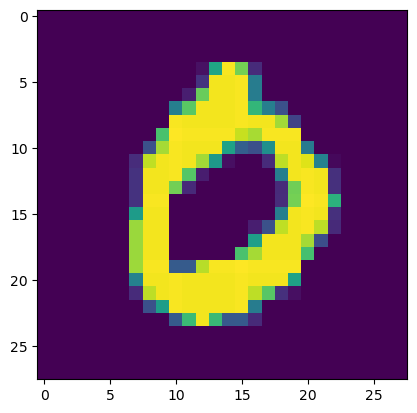

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3])
pred = model.predict([x_test])
print(np.argmax(pred[3]))
# my_model = tf.keras.models.load_model('mnist_num_reader.model')
# predictions = my_model.predict([x_test])